In [1]:
import pandas as pd
import datetime
import numpy as np


In [2]:
intel_processors = pd.read_csv(
    "./reference/intel_processors.csv",
    index_col='id',
    parse_dates={"date":["launch_date"]})
intel_ark_processors = pd.read_csv(
    "./reference/intel_ark_processors.csv",
    index_col='id',
    parse_dates={"date":["launch_date"]})
amd_processors = pd.read_csv("./reference/amd_processors.csv")

In [3]:
intel_ark_processors[(intel_ark_processors['date'].dt.year==2016) & (intel_ark_processors['processor_number'].str.contains('^i5|i7'))]

,date,cores,threads,name,processor_number,lithography,bus_speed,base_frequency,turbo_frequency,configurable_tdp_up_frequency,...,product_line,socket,memory_type,url,vertical_segment,max_memory_size,status,max_temp,sku,package_size
id,,,,,,,,,,,,,,,,,,,,,
52,2016-05-01,4.0,4.0,Intel Core i5-6685R,i5-6685R,14.0,8.0,3200.0,3800.0,NaN,...,NaN,NaN,"DDR4-1866/2133, DDR3L-1333/1600 @ 1.35V",https://ark.intel.com/content/www/us/en/ark/pr...,Desktop,67108864.0,Discontinued,71.0,93338,42mm x 28mm
107,2016-08-01,2.0,4.0,Intel Core i5-7Y54,i5-7Y54,14.0,4.0,1200.0,3200.0,1600.0,...,NaN,FCBGA1515,"LPDDR3-1866, DDR3L-1600",https://ark.intel.com/content/www/us/en/ark/pr...,Mobile,16777216.0,Launched,100.0,95452,20.5mm X 16.5mm
108,2016-05-01,4.0,4.0,Intel Core i5-6585R,i5-6585R,14.0,8.0,2800.0,3600.0,NaN,...,NaN,NaN,"DDR4-1866/2133, DDR3L-1333/1600 @ 1.35V",https://ark.intel.com/content/www/us/en/ark/pr...,Desktop,67108864.0,Discontinued,71.0,93337,42mm x 28mm
109,2016-02-01,4.0,4.0,Intel Core i5-6350HQ,i5-6350HQ,14.0,8.0,2300.0,3200.0,NaN,...,NaN,FCBGA1440,"DDR4-2133, LPDDR3-1866, DDR3L-1600",https://ark.intel.com/content/www/us/en/ark/pr...,Mobile,67108864.0,Discontinued,100.0,93335,42mm x 28mm
220,2016-08-01,2.0,4.0,Intel Core i5-7200U,i5-7200U,14.0,4.0,2500.0,3100.0,2700.0,...,NaN,FCBGA1356,"DDR4-2133, LPDDR3-1866, DDR3L-1600",https://ark.intel.com/content/www/us/en/ark/pr...,Mobile,33554432.0,Launched,100.0,95443,42mm X 24mm
635,2016-02-01,4.0,8.0,Intel Core i7-6770HQ,i7-6770HQ,14.0,8.0,2600.0,3500.0,NaN,...,NaN,FCBGA1440,"DDR4-2133, LPDDR3-1866, DDR3L-1600",https://ark.intel.com/content/www/us/en/ark/pr...,Mobile,67108864.0,Discontinued,100.0,93341,42mm x 28mm
703,2016-02-01,4.0,8.0,Intel Core i7-6870HQ,i7-6870HQ,14.0,8.0,2700.0,3600.0,NaN,...,NaN,FCBGA1440,"DDR4-2133, LPDDR3-1866, DDR3L-1600",https://ark.intel.com/content/www/us/en/ark/pr...,Mobile,67108864.0,Discontinued,100.0,93340,42mm x 28mm
704,2016-05-01,4.0,8.0,Intel Core i7-6785R,i7-6785R,14.0,8.0,3300.0,3900.0,NaN,...,NaN,NaN,"DDR4-1866/2133, DDR3L-1333/1600 @ 1.35V",https://ark.intel.com/content/www/us/en/ark/pr...,Desktop,67108864.0,Discontinued,71.0,93339,42mm x 28mm
705,2016-02-01,4.0,8.0,Intel Core i7-6970HQ,i7-6970HQ,14.0,8.0,2800.0,3700.0,NaN,...,NaN,FCBGA1440,"DDR4-2133, LPDDR3-1866, DDR3L-1600",https://ark.intel.com/content/www/us/en/ark/pr...,Mobile,67108864.0,Discontinued,100.0,93336,42mm x 28mm


In [4]:
display(intel_processors)

# intel_old_processors[(not intel_old_processors['processor_number'].isna()) & (intel_old_processors['processor_number'].str.contains('1220'))]

display(amd_processors)

,date,cores,threads,name,processor_number,lithography,bus_speed,base_frequency,turbo_frequency,configurable_tdp_up_frequency,...,socket,memory_type,url,vertical_segment,max_memory_size,status,max_temp,sku,package_size,fullname
id,,,,,,,,,,,,,,,,,,,,,
1,2013-08-01,2,2.0,Intel Atom C2338,C2338,22.0,NaN,1700.0,2000.0,NaN,...,FCBGA1283,DDR3/DDR3L 1333,https://www.intel.com/content/www/us/en/produc...,Embedded,16777216.0,Launched,NaN,77976,34 mm x 28 mm,"Intel Atom Processor C2338 (1M Cache, 1.70 GHz)"
2,2013-08-01,2,2.0,Intel Atom C2350,C2350,22.0,NaN,1700.0,2000.0,NaN,...,FCBGA1283,DDR3/DDR3L 1333,https://www.intel.com/content/www/us/en/produc...,Server,16777216.0,Launched,98.0,77977,34 mm x 28 mm,"Intel Atom Processor C2350 (1M Cache, 1.70 GHz)"
3,2013-08-01,2,2.0,Intel Atom C2358,C2358,22.0,NaN,1700.0,2000.0,NaN,...,FCBGA1283,DDR3/DDR3L 1333,https://www.intel.com/content/www/us/en/produc...,Embedded,16777216.0,Launched,NaN,77978,34 mm x 28 mm,"Intel Atom Processor C2358 (1M Cache, 1.70 GHz)"
4,2013-08-01,4,4.0,Intel Atom C2518,C2518,22.0,NaN,1700.0,NaN,NaN,...,FCBGA1283,DDR3/DDR3L 1333,https://www.intel.com/content/www/us/en/produc...,Embedded,33554432.0,Launched,NaN,77979,34 mm x 28 mm,"Intel Atom Processor C2518 (2M Cache, 1.70 GHz)"
5,2018-02-01,4,8.0,Intel Core i7-8709G,i7-8709G,14.0,8.0,3100.0,4100.0,NaN,...,BGA2270,DDR4-2400,https://www.intel.com/content/www/us/en/produc...,Mobile,67108864.0,Discontinued,100.0,130407,31mm x 58.5mm,Intel Core i7-8709G Processor with Radeon RX V...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2018-02-01,8,16.0,Intel Xeon D-2146NT,D-2146NT,14.0,NaN,2300.0,3000.0,NaN,...,FCBGA2518,DDR4,https://www.intel.com/content/www/us/en/produc...,Server,536870912.0,Launched,NaN,136434,NaN,"Intel Xeon D-2146NT Processor (11M Cache, 2.30..."
1095,2018-02-01,12,24.0,Intel Xeon D-2161I,D-2161I,14.0,NaN,2200.0,3000.0,NaN,...,FCBGA2518,DDR4,https://www.intel.com/content/www/us/en/produc...,Server,536870912.0,Launched,NaN,136435,NaN,"Intel Xeon D-2161I Processor (16.5M Cache, 2.2..."
1096,2018-02-01,14,28.0,Intel Xeon D-2177NT,D-2177NT,14.0,NaN,1900.0,3000.0,NaN,...,FCBGA2518,DDR4,https://www.intel.com/content/www/us/en/produc...,Server,536870912.0,Launched,NaN,136436,NaN,"Intel Xeon D-2177NT Processor (19.25M Cache, 1..."


,id,cores,threads,name,launch_date,lithography,base_frequency,turbo_frequency,cache_l1,cache_l2,cache_l3,tdp,product_line,socket,memory_type,url,vertical_segment,max_temp,max_memory_speed,sku
0,1,16.0,32.0,AMD Ryzen 9 5950X,2020-11-05,7.0,3400,4900.0,NaN,8192.0,65536.0,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10456,Boxed Processor,90.0,3200.0,10456
1,2,12.0,24.0,AMD Ryzen 9 5900X,2020-11-05,7.0,3700,4800.0,NaN,6144.0,65536.0,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10461,Boxed Processor,90.0,3200.0,10461
2,3,12.0,24.0,AMD Ryzen 9 5900 (OEM Only),2021-01-12,7.0,3000,4700.0,NaN,6144.0,65536.0,65.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10796,Desktop,95.0,3200.0,10796
3,4,8.0,16.0,AMD Ryzen 7 5800X,2020-11-05,7.0,3800,4700.0,NaN,4096.0,32768.0,105.0,AMD Ryzen 7 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10466,Boxed Processor,90.0,3200.0,10466
4,5,8.0,16.0,AMD Ryzen 7 5800 (OEM Only),2021-01-12,7.0,3400,4600.0,NaN,4096.0,32768.0,65.0,AMD Ryzen 7 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10791,Desktop,95.0,3200.0,10791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,534,4.0,4.0,AMD Opteron X2150 APU,NaN,28.0,1900,NaN,NaN,2048.0,NaN,22.0,AMD Opteron X2100 Series APU,FT3,DDR3,https://www.amd.com/en/product/5656,Server,NaN,NaN,5656
534,535,2.0,2.0,TL-64,NaN,NaN,2200,NaN,NaN,1024.0,NaN,35.0,AMD Turion 64 X2 Dual-Core Mobile Technology,S1,DDR2,https://www.amd.com/en/product/1706,Laptop,95.0,667.0,1706
535,536,2.0,2.0,TL-60,NaN,NaN,2000,NaN,NaN,1024.0,NaN,31.0,AMD Turion 64 X2 Dual-Core Mobile Technology,S1,DDR2,https://www.amd.com/en/product/1701,Laptop,NaN,667.0,1701
536,537,NaN,NaN,TL-56,NaN,NaN,1800,NaN,NaN,NaN,NaN,31.0,AMD Turion 64 X2 Dual-Core Mobile Technology,S1,Not Listed,https://www.amd.com/en/product/1696,Laptop,NaN,NaN,1696


In [5]:
fs_cpu_gpu_feb_22 = pd.read_csv(
    "./stats/cpu+gpu_Feb_2022.csv",
    skipinitialspace=True)

In [6]:
fs_cpu_gpu_feb_22.head()

,CPU_GPU,CNT
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506


## split the CPU and GPU into discrete columns (note these are not unique)

In [7]:
fs_cpu_gpu_feb_22[['cpu','gpu']] = fs_cpu_gpu_feb_22.CPU_GPU.str.split(' :: ', expand=True)

In [8]:
fs_cpu_gpu_feb_22['cpu'] = fs_cpu_gpu_feb_22['cpu'].str.replace('( CPU )?@.*$','',regex=True)
fs_cpu_gpu_feb_22.replace({"^\s*|\s*$":""}, regex=True, inplace=True) # clear leading/trailing space
fs_cpu_gpu_feb_22

,CPU_GPU,CNT,cpu,gpu
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177,Apple M1 (2400 MHz),MISC Class 3 Apple Apple M1
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
...,...,...,...,...
198239,Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz (230...,1,Intel(R) Core(TM) i7-10510U,NVIDIA Class 1 NVIDIA Corporation NVIDIA GeFor...
198240,AMD Ryzen 5 2600X Six-Core Processor ...,1,AMD Ryzen 5 2600X Six-Core Processor ...,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
198241,Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz (3239....,1,Intel(R) Core(TM) i7-4770,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
198242,Intel(R) Celeron(R) CPU G3930 @ 2.90GHz (800.0...,1,Intel(R) Celeron(R) CPU G3930,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...


In [9]:
fs_cpu_gpu_feb_22.head()
# fs_cpu_gpu_feb_22.head().value_counts()



,CPU_GPU,CNT,cpu,gpu
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177,Apple M1 (2400 MHz),MISC Class 3 Apple Apple M1
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...


## Extract the cpu code (multiple passes needed for all model series)

In [10]:
fs_cpu_gpu_feb_22['cpu_make'] =  fs_cpu_gpu_feb_22['cpu'].str.extract('(Intel|AMD|Apple)')
fs_cpu_gpu_feb_22.loc[(fs_cpu_gpu_feb_22['cpu_make'].isna()) & (fs_cpu_gpu_feb_22['cpu'].str.contains('Pentium')), 'cpu_make'] =  'Intel'
fs_cpu_gpu_feb_22.loc[(fs_cpu_gpu_feb_22['cpu_make'].isna()) & (fs_cpu_gpu_feb_22['cpu'].str.contains('Celeron')), 'cpu_make'] =  'Intel'
# pentiums = fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'].isna()) & (fs_cpu_gpu_feb_22['cpu'].str.contains('Pentium'))]
# pentiums = pd.DataFrame(pentiums, columns=["cpu_make"])
# pentiums['cpu_make'] = 'Intel'
# pentiums
# fs_cpu_gpu_feb_22.merge(pentiums)
display(fs_cpu_gpu_feb_22['cpu_make'].value_counts(dropna=False))
# fs_cpu_gpu_feb_22.update(pentiums)
# pentiums['cpu_make'].value_counts(dropna=False)
# 
display(fs_cpu_gpu_feb_22[fs_cpu_gpu_feb_22['cpu_make'].isna()])
fs_cpu_gpu_feb_22

Intel    131060
AMD       67061
NaN         113
Apple        10
Name: cpu_make, dtype: int64

,CPU_GPU,CNT,cpu,gpu,cpu_make
3434,06/7a (1094.4 MHz) :: MISC Class 0 Red Hat v...,345,06/7a (1094.4 MHz),MISC Class 0 Red Hat virgl,NaN
5539,06/8c (2995.2 MHz) :: MISC Class 2 Red Hat v...,202,06/8c (2995.2 MHz),MISC Class 2 Red Hat virgl,NaN
6034,06/7a (1094.4 MHz) :: MISC Class 0 Mesa/X.or...,184,06/7a (1094.4 MHz),MISC Class 0 Mesa/X.org virgl,NaN
8908,06/7a (1094.4 MHz) :: MISC Class 1 Mesa/X.or...,120,06/7a (1094.4 MHz),MISC Class 1 Mesa/X.org virgl,NaN
9736,06/7a (1094.4 MHz) :: MISC Class 1 Red Hat v...,109,06/7a (1094.4 MHz),MISC Class 1 Red Hat virgl,NaN
...,...,...,...,...,...
189277,Virtual CPU @ 3.20GHz (1584.02 MHz) :: MISC ...,1,Virtual,MISC Class 5 Parallels and Apple Parallels u...,NaN
189792,DG1002FGF84HT (1593.87 MHz) :: MISC Class 4 ...,1,DG1002FGF84HT (1593.87 MHz),MISC Class 4 X.Org AMD Liverpool (PS4) (LIVE...,NaN
191549,06/5c (1094.43 MHz) :: MISC Class 2 Mesa/X.o...,1,06/5c (1094.43 MHz),MISC Class 2 Mesa/X.org virgl,NaN
192228,DG1101SKF84HV (1593.94 MHz) :: MISC Class 4 ...,1,DG1101SKF84HV (1593.94 MHz),MISC Class 4 AMD AMD Liverpool (PlayStation ...,NaN


,CPU_GPU,CNT,cpu,gpu,cpu_make
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177,Apple M1 (2400 MHz),MISC Class 3 Apple Apple M1,Apple
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel
...,...,...,...,...,...
198239,Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz (230...,1,Intel(R) Core(TM) i7-10510U,NVIDIA Class 1 NVIDIA Corporation NVIDIA GeFor...,Intel
198240,AMD Ryzen 5 2600X Six-Core Processor ...,1,AMD Ryzen 5 2600X Six-Core Processor ...,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,AMD
198241,Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz (3239....,1,Intel(R) Core(TM) i7-4770,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel
198242,Intel(R) Celeron(R) CPU G3930 @ 2.90GHz (800.0...,1,Intel(R) Celeron(R) CPU G3930,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel


In [11]:
import re

In [12]:
# fs_cpu_gpu_feb_22['cpu_code']
def create_processor_number(row):
    intel_cpu_code_re = [
        r'((W([0-9]+)?)|(E[0-9]\-[0-9]+( v[0-9]+)?))',
        r'([NGQJEPT][0-9]{4})',
        r'([0-9]{4}U)',
        r'([0-9]{4}M)',
        r'(i[0-9]-[0-9]+[\S]+)',
        r'(i[0-9]-[0-9]+[\S]+)']
    intel_ark_cpu_code_re = [
        r'((W([0-9]+)?)|(E[0-9]\-[0-9]+( v[0-9]+)?))',
        r'([NGQJEPT][0-9]{4})',
        r'([0-9]{4}U)',
        r'([0-9]{4}M)',
        r'(i[0-9]-[0-9]+[\S]+)',
        r'(i[0-9]-[0-9]+[\S]+)']
    amd_cpu_code_re = [
        r'(AMD Ryzen [0-9] [0-9]+[\S])',
        r'((AMD Athlon)(?:[\S]+)? ?(?:[\S]+ ?){0,2} ?[0-9]{3,4}([\S])?)' ]
    apple_cpu_code_re = [
        r'(Apple M[0-9](?: (Max|Pro))?)'
    ]
    try:
        # display(row.head())
        if row['cpu_make'] == 'Intel':
            # row['processor_number'] = row['cpu'].str.extract('()', expand=True)
            try:
                return re.search('(' + '|'.join(intel_cpu_code_re) + ')', row["cpu"])[0]
            except TypeError:
                try:
                    # print("exception [" + row["cpu"] + ']')
                    return re.search('(\S+)$', row["cpu"])[0]
                except TypeError:
                    return None
        if row['cpu_make'] == 'Apple':
            # row['processor_number'] = row['cpu'].str.extract('()', expand=True)
            try:
                return re.search('(' + '|'.join(apple_cpu_code_re) + ')', row["cpu"])[0]
            except TypeError:
                    return None
        if row['cpu_make'] == 'AMD':
            # row['processor_number'] = row['cpu'].str.extract('()', expand=True)
            try:
                return re.search('(' + '|'.join(amd_cpu_code_re) + ')', row["cpu"])[0]
            except TypeError:
                    return None
    except KeyError:
        return None

fs_cpu_gpu_feb_22['processor_number'] = fs_cpu_gpu_feb_22.apply(create_processor_number,axis=1)
display(fs_cpu_gpu_feb_22)

,CPU_GPU,CNT,cpu,gpu,cpu_make,processor_number
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177,Apple M1 (2400 MHz),MISC Class 3 Apple Apple M1,Apple,Apple M1
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,i7-10750H
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,i5-9300H
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506,Intel(R) Core(TM) i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,i7-10750H
...,...,...,...,...,...,...
198239,Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz (230...,1,Intel(R) Core(TM) i7-10510U,NVIDIA Class 1 NVIDIA Corporation NVIDIA GeFor...,Intel,i7-10510U
198240,AMD Ryzen 5 2600X Six-Core Processor ...,1,AMD Ryzen 5 2600X Six-Core Processor ...,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,AMD,AMD Ryzen 5 2600X
198241,Intel(R) Core(TM) i7-4770 CPU @ 3.40GHz (3239....,1,Intel(R) Core(TM) i7-4770,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,i7-4770
198242,Intel(R) Celeron(R) CPU G3930 @ 2.90GHz (800.0...,1,Intel(R) Celeron(R) CPU G3930,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,G3930


In [13]:
fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'] == 'Intel') & (fs_cpu_gpu_feb_22['processor_number'].isna())].groupby(fs_cpu_gpu_feb_22['cpu']).agg('sum')

,CNT
cpu,


In [14]:
# fs_cpu_gpu_feb_22[fs_cpu_gpu_feb_22['cpu'].str.contains('Xeon|Core|AMD')]
# fs_cpu_gpu_feb_22[fs_cpu_gpu_feb_22['cpu'].str.contains('Celeron')]
# fs_cpu_gpu_feb_22[fs_cpu_gpu_feb_22['cpu'].str.contains('Athlon')]
unidentified_cpus = fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'].isna()) & (fs_cpu_gpu_feb_22['processor_number'].isna())]['CNT'].agg('sum')
# fs_cpu_gpu_feb_22.drop("process_number", inplace=True, axis=1)
unidentified_cpus

1720

In [15]:
identified_cpus = fs_cpu_gpu_feb_22.loc[fs_cpu_gpu_feb_22['cpu_make'] == 'Intel']['processor_number'].isna()\
    .sort_values().value_counts()
print("Identified {:d} cpus out of {:d}: {:d}% unidentified".format(int(identified_cpus), int(identified_cpus+unidentified_cpus), int(unidentified_cpus/identified_cpus*100)))

Identified 131060 cpus out of 132780: 1% unidentified


In [16]:
# fs_cpu_gpu_feb_22.rename(columns={'cpu_code':'processor_number'}, inplace=True)
display(fs_cpu_gpu_feb_22.shape)
# # intel_processors.head()
# intel_with_year = fs_cpu_gpu_feb_22.merge(intel_processors[['processor_number','date']], on=['processor_number'])
# display(intel_with_year.head())
just_intel = fs_cpu_gpu_feb_22[fs_cpu_gpu_feb_22['cpu_make']=='Intel']
intel_ark_with_year = just_intel.merge(intel_ark_processors[['processor_number','date']], on=['processor_number'], how='left')
intel_with_year = intel_ark_with_year[intel_ark_with_year['date'].isna()].drop(['date'],axis=1).merge(intel_ark_processors[['processor_number','date']], on=['processor_number'], how='left')
intel_with_year = pd.concat([intel_with_year, intel_ark_with_year])
display(intel_ark_with_year.shape)
display(intel_with_year.shape)

(198244, 6)

(137494, 7)

(144885, 7)

In [17]:
display(intel_with_year[intel_with_year['processor_number'] == 'i5-9300H'])

,CPU_GPU,CNT,cpu,gpu,cpu_make,processor_number,date
0,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01
2,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,i5-9300H,2019-05-01
54,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,10894,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,i5-9300H,2019-05-01
65,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,10204,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01
285,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,3618,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01
...,...,...,...,...,...,...,...
131734,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,1,Intel(R) Core(TM) i5-9300H,NVIDIA Class 2 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01
132322,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2399...,1,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01
133759,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,1,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01
134041,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2399...,1,Intel(R) Core(TM) i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,Intel,i5-9300H,2019-05-01


<AxesSubplot:xlabel='date'>

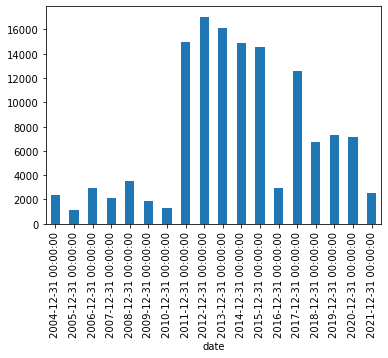

In [18]:
intel_with_year[~intel_with_year['date'].isna()].groupby(pd.Grouper(key='date', axis=0, freq='Y')).agg('count')['cpu'].plot(kind='bar')

In [19]:
intel_with_year.head()

,CPU_GPU,CNT,cpu,gpu,cpu_make,processor_number,date
0,Intel(R) Xeon(R) CPU E5-2678 v3 @ 2.50GHz (250...,12699,Intel(R) Xeon(R) CPU E5-2678 v3,NVIDIA Class 5 NVIDIA Corporation Quadro P5000...,Intel,E5-2678 v3,NaT
1,Intel(R) Core(TM) i3-1000NG4 CPU @ 1.10GHz (11...,3875,Intel(R) Core(TM) i3-1000NG4,INTEL Class 3 Intel Inc. Intel(R) Iris(TM) Pl...,Intel,i3-1000NG4,NaT
2,Intel(R) Xeon(R) CPU E5-2678 v3 @ 2.50GHz (250...,2935,Intel(R) Xeon(R) CPU E5-2678 v3,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,Intel,E5-2678 v3,NaT
3,Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz (11...,2861,Intel(R) Core(TM) i5-1030NG7,INTEL Class 3 Intel Inc. Intel(R) Iris(TM) Pl...,Intel,i5-1030NG7,NaT
4,Intel(R) Xeon(R) CPU E5-2678 v3 @ 2.50GHz (249...,2852,Intel(R) Xeon(R) CPU E5-2678 v3,NVIDIA Class 5 NVIDIA Corporation Quadro P5000...,Intel,E5-2678 v3,NaT


In [22]:
def summarise_cpu_by_processor_number(df):
    display(df.shape)
    just_cpu = df.drop(['CPU_GPU','gpu','cpu_make','cpu'], axis=1)
    just_cpu['count'] = just_cpu.groupby('processor_number')['CNT'].transform('sum')
    just_cpu.drop_duplicates(subset=['processor_number'],inplace=True)
    # .agg('sum').sort_values(by='CNT', ascending=False)
    display(just_cpu[just_cpu['processor_number'] == 'i5-9300H'])
    # [(~intel_with_year_unique['processor_number'].isna()) & (intel_with_year_unique['date'].isna())].groupby(intel_with_year_unique['cpu'])
    # .agg('sum').sort_values(by='CNT', ascending=False)
    return just_cpu

just_cpu = summarise_cpu_by_processor_number(intel_with_year)

(144885, 7)

,CNT,processor_number,date,count
0,39879,i5-9300H,2019-05-01,120974


In [ ]:
display(just_cpu[['processor_number', 'CNT', 'count']].agg('sum'))
display(just_cpu[['processor_number', 'CNT', 'count']].value_counts(dropna=False))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


In [ ]:
df =  just_cpu[~just_cpu['date'].isna()].groupby(pd.Grouper(key='date', axis=0, freq='Y'))['count'].agg('sum')
ax = df.plot.bar()
display(df)
plt.ticklabel_format(style='plain', axis='y')
# plt.set_index(just_cpu['date'].map(lambda s: s.strftime('%Y')))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# ax.set_xlim(df.index[0], df.index[-1])
# locator = mdates.YearLocator()
# ax.xaxis.set_major_locator(locator)
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, p: str(df.index[x])[0:4]))
# plt.show()
